In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
os.chdir("D:\\edwisor\\Churn_Reduction")  

In [3]:
train_data=pd.read_csv("Train_data.csv")
test_data=pd.read_csv("Test_data.csv")

In [4]:
train_data.shape

(3333, 21)

In [5]:
train_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
test_data.shape

(1667, 21)

In [7]:
test_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


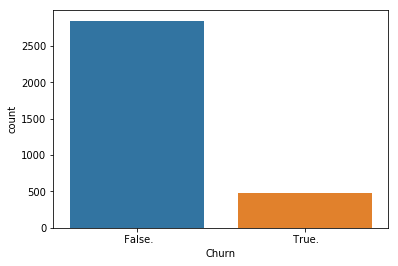

In [8]:
sns.countplot(train_data['Churn'])

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes           

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 21 columns):
state                            1667 non-null object
account length                   1667 non-null int64
area code                        1667 non-null int64
phone number                     1667 non-null object
international plan               1667 non-null object
voice mail plan                  1667 non-null object
number vmail messages            1667 non-null int64
total day minutes                1667 non-null float64
total day calls                  1667 non-null int64
total day charge                 1667 non-null float64
total eve minutes                1667 non-null float64
total eve calls                  1667 non-null int64
total eve charge                 1667 non-null float64
total night minutes              1667 non-null float64
total night calls                1667 non-null int64
total night charge               1667 non-null float64
total intl minutes           

In [11]:
desc=train_data.describe()
desc

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [12]:
train_data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

# EDA

Both of the train_data and test_data does not contain any missing values 

# Feature Selection

In [13]:
num = pd.DataFrame(train_data.select_dtypes(include=np.number))
cor = num.corr()        #correlation between numerical variables
cor

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


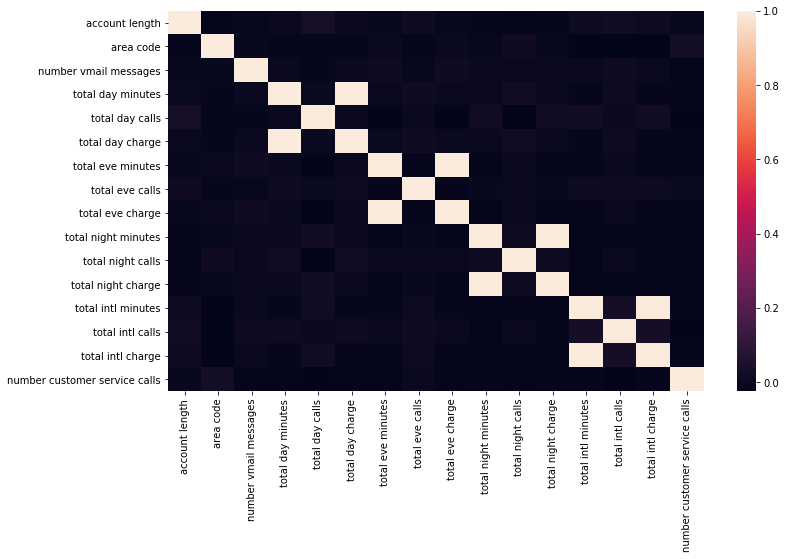

In [14]:
f, ax= plt.subplots(figsize=(12,7))
sns.heatmap(cor,ax=ax)

There is a high dependency between the followings:
 total day minutes & total day charge , 
 total eve minutes & total eve charge ,
 total night charge & total night minutes ,
 total intl charge & total intl minutes

In [15]:
train_data.select_dtypes(exclude=np.number).columns

Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'Churn'],
      dtype='object')

In [16]:
cat_names=['state', 'phone number', 'international plan', 'voice mail plan']

In [17]:
#chi-square test
for i in cat_names:
    print(i)
    ch, p, dof, ex = chi2_contingency(pd.crosstab(train_data['Churn'], train_data[i]))
    print(p)
    print('\n')

state
0.002296221552011188


phone number
0.49185608455943547


international plan
2.4931077033159556e-50


voice mail plan
5.15063965903898e-09




p-value of phone number is greater than 0.05, therefore churn has no dependency on phone number

In [18]:
#merging the two given datasets
all_data=pd.concat([train_data.iloc[:],test_data.iloc[:]],ignore_index=True)

In [19]:
all_data=all_data.drop(['phone number','state','total day minutes','total eve minutes','total night minutes','total intl minutes'],axis=1)

In [20]:
all_data['Churn'] = all_data['Churn'].replace(' False.',0)
all_data['Churn'] = all_data['Churn'].replace(' True.',1)

In [21]:
all_data.shape

(5000, 15)

In [22]:
all_data.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,137,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,84,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,75,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


# Bivariate analysis

In [23]:
all_data['Churn'].value_counts()

0    4293
1     707
Name: Churn, dtype: int64

In [24]:
#Percentage of people who churn out for differnt cases
z=all_data[['international plan','Churn']].groupby(['international plan'],as_index=False).sum()
z

,international plan,Churn
0,no,508
1,yes,199


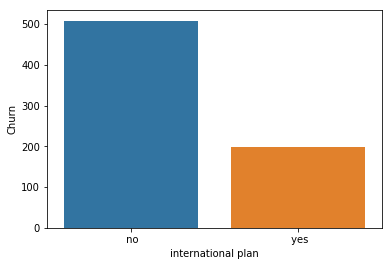

In [25]:
sns.barplot(x=z['international plan'],y=z['Churn'])

In [26]:
z=all_data[['voice mail plan','Churn']].groupby(['voice mail plan'],as_index=False).sum()
z

,voice mail plan,Churn
0,no,605
1,yes,102


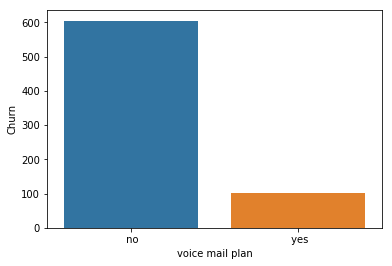

In [27]:
sns.barplot(x=z['voice mail plan'],y=z['Churn'])

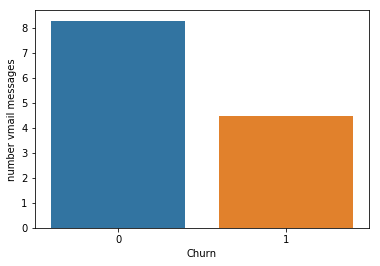

In [28]:
sns.barplot(x=all_data['Churn'],y=all_data['number vmail messages'],ci=None)
#customers whose avg no of vmail msg are less have greater probability of churning out

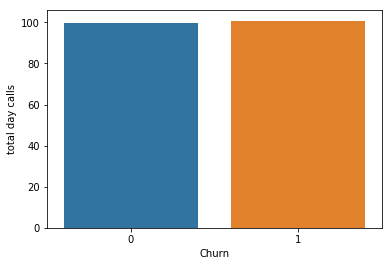

In [29]:
sns.barplot(x=all_data['Churn'],y=all_data['total day calls'],ci=None)

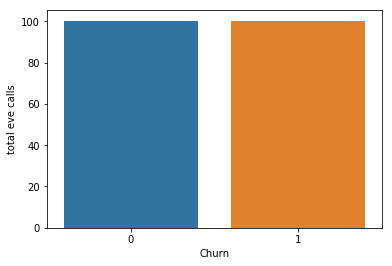

In [30]:
sns.barplot(x=all_data['Churn'],y=all_data['total eve calls'],ci=None)

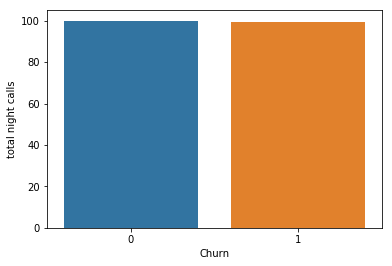

In [31]:
sns.barplot(x=all_data['Churn'],y=all_data['total night calls'],ci=None)

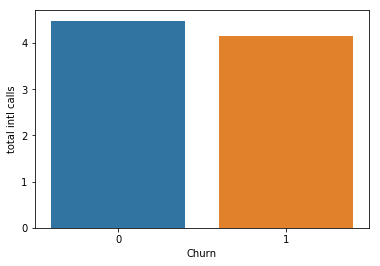

In [32]:
sns.barplot(x=all_data['Churn'],y=all_data['total intl calls'],ci=None)

Therefore we conclude that churning does not depend much on total day calls, total eve calls and total night calls and slightly dependent on total intl calls

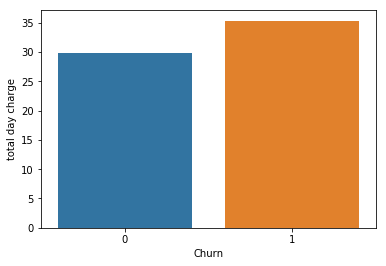

In [33]:
sns.barplot(x=all_data['Churn'],y=all_data['total day charge'],ci=None)

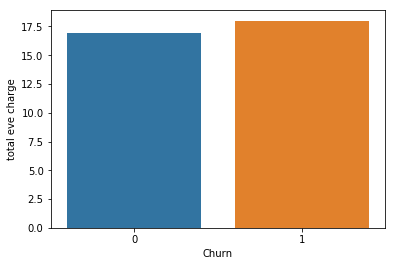

In [34]:
sns.barplot(x=all_data['Churn'],y=all_data['total eve charge'],ci=None)

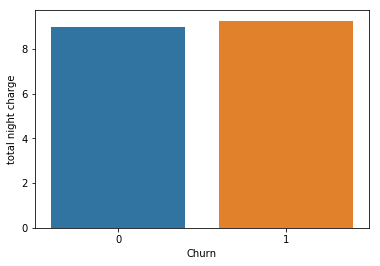

In [35]:
sns.barplot(x=all_data['Churn'],y=all_data['total night charge'],ci=None)

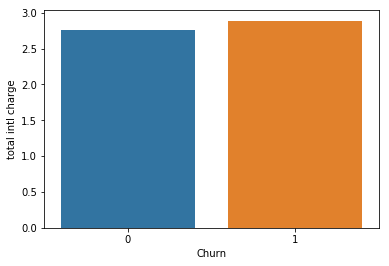

In [36]:
sns.barplot(x=all_data['Churn'],y=all_data['total intl charge'],ci=None)

Therefore churning is slightly more if the average of charge is higher

In [37]:
all_data['number customer service calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8], dtype=int64)

In [38]:
z=all_data[['number customer service calls','Churn']].groupby(['number customer service calls'],as_index=False).sum()
z

,number customer service calls,Churn
0,0,121
1,1,190
2,2,122
3,3,73
4,4,111
5,5,58
6,6,22
7,7,7
8,8,1
9,9,2


In [39]:
all_data['number customer service calls'].value_counts()

1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: number customer service calls, dtype: int64

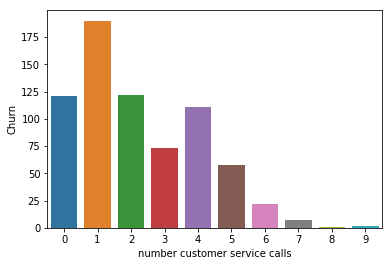

In [40]:
sns.barplot(z['number customer service calls'],z['Churn'])

In [41]:
all_data['international plan'] = all_data['international plan'].replace(' yes',1)
all_data['international plan'] = all_data['international plan'].replace(' no',0)
all_data['voice mail plan'] = all_data['voice mail plan'].replace(' yes',1)
all_data['voice mail plan'] = all_data['voice mail plan'].replace(' no',0)

In [42]:
all_data['area code'].unique()

array([415, 408, 510], dtype=int64)

In [43]:
all_data['area code']=all_data['area code'].astype(str)

In [44]:
all_data.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


# Univariate Analysis

<function matplotlib.pyplot.plot(*args, **kwargs)>

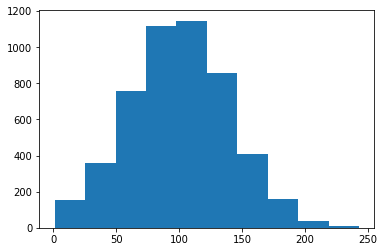

In [45]:
plt.hist(all_data['account length'])
plt.plot

<function matplotlib.pyplot.plot(*args, **kwargs)>

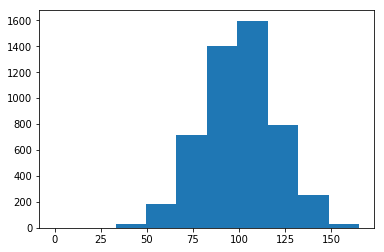

In [46]:
plt.hist(all_data['total day calls'])
plt.plot

<function matplotlib.pyplot.plot(*args, **kwargs)>

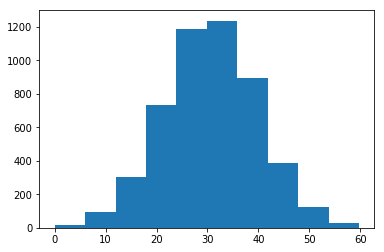

In [47]:
plt.hist(all_data['total day charge'])
plt.plot

most of the data are normalised

# we would not go for feature scaling as we are using Random Forest algorithm which does not require the data to be scaled

In [48]:
all_data=pd.get_dummies(all_data,drop_first=True)

In [49]:
all_data.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn,area code_415,area code_510
0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,1,0
1,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,1,0
2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,1,0
3,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,0,0
4,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,1,0


In [50]:
all_data.shape

(5000, 16)

In [51]:
trainer=all_data.iloc[:train_data.shape[0],:]
tester=all_data.iloc[train_data.shape[0]:,:]

In [52]:
trainer.shape

(3333, 16)

In [53]:
tester.shape

(1667, 16)

In [54]:
#we are not doing the OUTLIER ANALYSIS because the dataset is not very large and there is a problem of target class imbalance

# Sampling

In [55]:
trainer['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [56]:
p=(483/(2850+483))*100
print("pecentage of people churn={}".format(p))

pecentage of people churn=14.491449144914492


Since I have to decrease the False Negative Rate, therefore we have to resample the data. For this I would randomly over
sample the data of minority class

In [57]:
samp1 = trainer[trainer['Churn']==1].sample(400)
samp2 = trainer[trainer['Churn']==1].sample(400)

In [58]:
samp1.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn,area code_415,area code_510
2158,166,1,0,0,89,8.11,95,22.47,97,10.58,3,3.56,0,1,0,1
1842,97,0,0,0,82,46.94,106,17.09,73,10.41,4,2.40,0,1,0,0
2493,21,0,0,0,95,15.74,70,13.76,78,12.83,3,3.05,5,1,1,0
3287,170,0,1,42,119,33.92,90,11.48,49,8.31,3,2.94,4,1,1,0
1851,85,0,0,0,96,28.19,141,16.15,116,6.48,3,2.94,5,1,0,1


In [59]:
train=pd.concat([trainer.iloc[:],samp1.iloc[:],samp2.iloc[:]],ignore_index=True)

In [60]:
train.shape

(4133, 16)

In [61]:
trainer=train.copy()

In [62]:
#shuffle the data
from sklearn.utils import shuffle
trainer=shuffle(trainer)

In [63]:
trainer['Churn'].value_counts()

0    2850
1    1283
Name: Churn, dtype: int64

In [64]:
p=(1283/(2850+1283))*100
print("pecentage of people churn={}".format(p))

pecentage of people churn=31.042826034357606


In [65]:
#not increasing the percentage more so as to avoid overfitting

# Modeling

In [66]:
y_train=trainer['Churn']
X_train=trainer.drop('Churn',axis=1)

In [67]:
y_test=tester['Churn']
X_test=tester.drop('Churn',axis=1)

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=400,max_depth=100,random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [69]:
rf.score(X_test,y_test)

0.9592081583683263

In [70]:
y_pred=rf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1433,   10],
       [  58,  166]], dtype=int64)

In [71]:
FNR= (58/(166+58))

In [72]:
FNR

0.25892857142857145

In [73]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=rf,X=X_train,y=y_train,cv=10)
accuracies.mean()

0.9859651893181738

In [74]:
accuracies.std()

0.006387422333410798

In [75]:
accuracies

array([0.99275362, 0.98067633, 0.99033816, 0.98789346, 0.98547215,
       0.97820823, 0.98789346, 0.97336562, 0.98789346, 0.99515738])

In [106]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=0,max_depth=6)
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [107]:
xg.score(X_test,y_test)

e:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9622075584883023

In [108]:
y_pred2=xg.predict(X_test)
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
cm2

e:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[1432,   11],
       [  52,  172]], dtype=int64)

In [109]:
FNR2= (52/(172+52))
FNR2

0.23214285714285715